# **Sprint 4 - AI & CHATBOT**
FIAP - Análise e Desenvolvimento de Sistemas

### **Descrição do conjunto de dados escolhido e objetivo do modelo:**



**Objetivo do Modelo**  
O objetivo de criar modelos de classificação a partir desse conjunto de dados é prever a categoria "tipo_de_ocorrencia" com base em outras variáveis presentes no conjunto de dados. A coluna "tipo_de_ocorrencia" indica o tipo de ocorrência do acidente, sendo possível prever essa categoria com base em outras informações, como a hora, o trecho da rodovia, o sentido, o tipo de acidente, entre outros.



**Origem**  
O conjunto de dados foi coletado na plataforma Kaggle.  

**Nome**  
O conjunto de dados apresenta o nome referido como "Demonstrativos de Acidentes".

**Tamanho**  
O conjunto de dados tem o tamanho de 4.04kb e 1.08kb.

**Dados Faltantes**  
O conjunto de dados fornecido apresenta valores nulos. Os valores ausentes foram tratados no decorrer do código.


### **Modelo de Agrupamento:**

C:\Users\edubj\AppData\Local\Temp\ipykernel_8228\3869740766.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)
C:\Users\edubj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


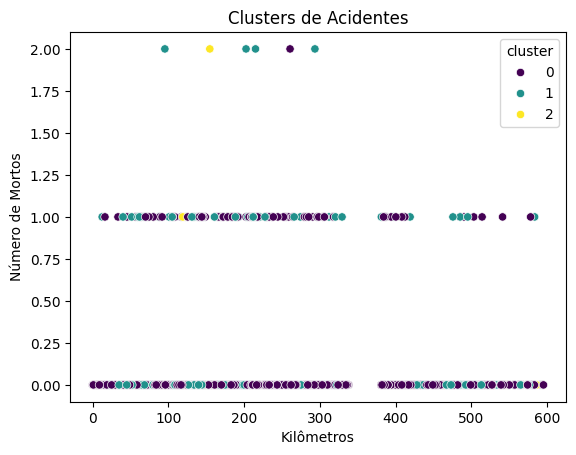

In [28]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando os dados
data = pd.read_csv('RIOSP.csv', delimiter=';', encoding='latin-1')

# Substituindo vírgulas por pontos e convertendo para float
data['km'] = data['km'].str.replace(',', '.').astype(float)

# Selecionando as variáveis relevantes para o clustering
X = data[['km', 'automovel', 'bicicleta', 'caminhao', 'moto', 'onibus', 'outros', 'tracao_animal',
          'transporte_de_cargas_especiais', 'trator_maquinas', 'utilitarios', 'ilesos',
          'levemente_feridos', 'moderadamente_feridos', 'gravemente_feridos', 'mortos']]

# Tratando valores nulos
X.fillna(0, inplace=True)

# Normalizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicando o K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

# Visualizando os clusters
sns.scatterplot(data=data, x='km', y='mortos', hue='cluster', palette='viridis')
plt.title('Clusters de Acidentes')
plt.xlabel('Kilômetros')
plt.ylabel('Número de Mortos')
plt.show()


### **Modelo de Regressão:**

Mean Squared Error: 0.01714999415254704


C:\Users\edubj\AppData\Local\Temp\ipykernel_8228\1199846431.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


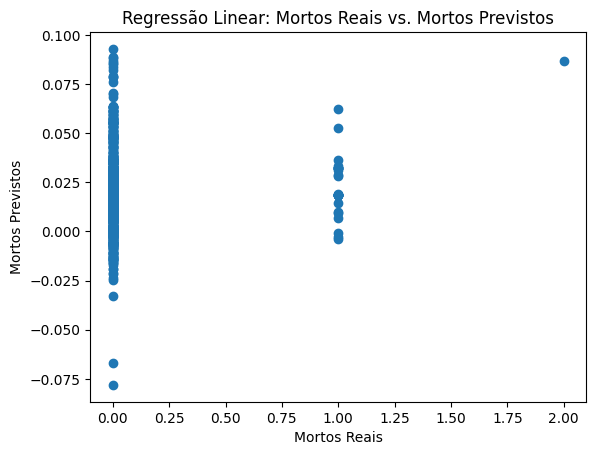

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Carregando os dados
data = pd.read_csv('RIOSP.csv', delimiter=';', encoding='latin-1')

# Substituindo vírgulas por pontos e convertendo para float
data['km'] = data['km'].str.replace(',', '.').astype(float)

# Selecionando as variáveis relevantes para a regressão
X = data[['km', 'automovel', 'bicicleta', 'caminhao', 'moto', 'onibus', 'outros', 'tracao_animal',
          'transporte_de_cargas_especiais', 'trator_maquinas', 'utilitarios', 'ilesos',
          'levemente_feridos', 'moderadamente_feridos', 'gravemente_feridos']]

# Tratando valores nulos
X.fillna(0, inplace=True)

# Variável alvo (y)
y = data['mortos']

# Tratando valores nulos na variável alvo
y.fillna(0, inplace=True)

# Dividindo o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializando o modelo de regressão linear
model = LinearRegression()

# Treinando o modelo
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o desempenho do modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualizando as previsões em relação aos valores reais
plt.scatter(y_test, y_pred)
plt.xlabel('Mortos Reais')
plt.ylabel('Mortos Previstos')
plt.title('Regressão Linear: Mortos Reais vs. Mortos Previstos')
plt.show()


### **Modelo de Classificação:**

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer

# Carregar o arquivo CSV
file_path = 'RIOSP.csv'
df = pd.read_csv(file_path, delimiter=';', encoding='ISO-8859-1')

# Selecionar colunas relevantes
features = df[['horario', 'tipo_de_ocorrencia', 'km', 'trecho', 'sentido', 'tipo_de_acidente',
               'automovel', 'bicicleta', 'caminhao', 'moto', 'onibus', 'outros', 'tracao_animal',
               'transporte_de_cargas_especiais', 'trator_maquinas', 'utilitarios', 'ilesos',
               'levemente_feridos', 'moderadamente_feridos', 'gravemente_feridos', 'mortos']]

# Usar loc para evitar SettingWithCopyWarning
features.loc[:, 'km'] = features['km'].str.replace(',', '.').astype(float)
features.loc[:, 'horario'] = pd.to_datetime(features['horario'], format='%H:%M:%S').dt.hour * 60 + pd.to_datetime(features['horario'], format='%H:%M:%S').dt.minute
features.loc[:, 'tipo_de_ocorrencia'] = features['tipo_de_ocorrencia'].astype('category').cat.codes
features.loc[:, 'trecho'] = features['trecho'].astype('category').cat.codes
features.loc[:, 'sentido'] = features['sentido'].astype('category').cat.codes
features.loc[:, 'tipo_de_acidente'] = features['tipo_de_acidente'].astype('category').cat.codes

# Substituir NaN usando SimpleImputer com a mediana
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(features)

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_imputed, df['tipo_de_ocorrencia'], test_size=0.2, random_state=42)

# Criar e treinar o modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Acurácia do modelo: {accuracy}')
print('Relatório de Classificação:')
print(report)


C:\Users\edubj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\impute\_base.py:558: UserWarning: Skipping features without any observed values: ['transporte_de_cargas_especiais']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Acurácia do modelo: 0.9989088925259137
Relatório de Classificação:
                                  precision    recall  f1-score   support

AC01 - Acidente com VITIMA FATAL       1.00      0.80      0.89         5
      AC02 - Acidente com VITIMA       0.99      1.00      1.00       163
      AC03 - Acidente sem VITIMA       1.00      1.00      1.00       268
            AC04 - Atropelamento       1.00      1.00      1.00        14
      AC05 - Atropelamento Fatal       1.00      1.00      1.00         4
              Acidente com morte       1.00      1.00      1.00         8
             Acidente com vítima       1.00      1.00      1.00       485
             Acidente sem vítima       1.00      1.00      1.00       842
         Atropelamento com morte       1.00      1.00      1.00        12
         Atropelamento sem morte       1.00      1.00      1.00        32

                        accuracy                           1.00      1833
                       macro avg       1.00